# Glass Prediction using KNN

## Installing useful library

In [1]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 22.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df=pd.read_csv('gdrive/My Drive/glass.csv')

## Data Preprocessing

In [5]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df = df.drop_duplicates()

In [7]:
df = df.dropna()

In [8]:
df['Type'].value_counts()

,count
Type,
2,76
1,69
7,29
3,17
5,13
6,9


In [9]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [10]:
X = df.drop('Type', axis='columns').values
X[0:5]

array([[1.52101e+00, 1.36400e+01, 4.49000e+00, 1.10000e+00, 7.17800e+01,
        6.00000e-02, 8.75000e+00, 0.00000e+00, 0.00000e+00],
       [1.51761e+00, 1.38900e+01, 3.60000e+00, 1.36000e+00, 7.27300e+01,
        4.80000e-01, 7.83000e+00, 0.00000e+00, 0.00000e+00],
       [1.51618e+00, 1.35300e+01, 3.55000e+00, 1.54000e+00, 7.29900e+01,
        3.90000e-01, 7.78000e+00, 0.00000e+00, 0.00000e+00],
       [1.51766e+00, 1.32100e+01, 3.69000e+00, 1.29000e+00, 7.26100e+01,
        5.70000e-01, 8.22000e+00, 0.00000e+00, 0.00000e+00],
       [1.51742e+00, 1.32700e+01, 3.62000e+00, 1.24000e+00, 7.30800e+01,
        5.50000e-01, 8.07000e+00, 0.00000e+00, 0.00000e+00]])

In [11]:
y = df['Type'].values
y[0:5]

array([1, 1, 1, 1, 1])

## Normalize the data

In [12]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.87984017,  0.28955813,  1.25723832, -0.70637047, -1.13324789,
        -0.67348013, -0.14346582, -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, -0.18086272,  0.09703652,
        -0.02896224, -0.79020061, -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 ,  0.18295033,  0.43374593,
        -0.16707322, -0.82534924, -0.35380764, -0.58830108],
       [-0.22729127, -0.23821559,  0.7017978 , -0.32234558, -0.05836783,
         0.10914874, -0.51604129, -0.35380764, -0.58830108],
       [-0.30660815, -0.16457274,  0.65319675, -0.42340476,  0.55029919,
         0.07845741, -0.62148718, -0.35380764, -0.58830108]])

In [13]:
X.shape

(213, 9)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170, 9), (43, 9), (170,), (43,))

## Modelling

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [16]:
max_k = 10
acc = np.zeros(max_k)

for k in range(1, max_k+1):
  y_hat = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_test)
  acc[k-1] = metrics.accuracy_score(y_test, y_hat)

acc

array([0.65116279, 0.62790698, 0.69767442, 0.60465116, 0.65116279,
       0.62790698, 0.65116279, 0.6744186 , 0.65116279, 0.6744186 ])

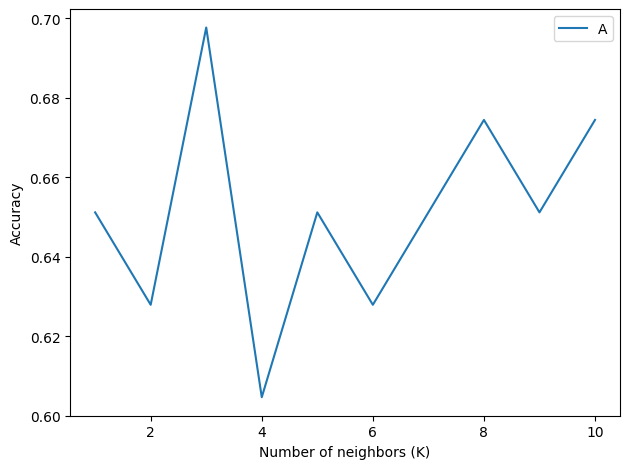

Best result: k = 3, accuracy = 0.6976744186046512


In [17]:
plt.plot(range(1, max_k+1), acc)
plt.legend('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors (K)')
plt.tight_layout()
plt.show()
print(f"Best result: k = {acc.argmax()+1}, accuracy = {acc.max()}")